In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('dataset_54_vehicle.csv', sep=',')
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [7]:
attribute = 'Class'
variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')
print (variables)

['van' 'saab' 'bus' 'opel']


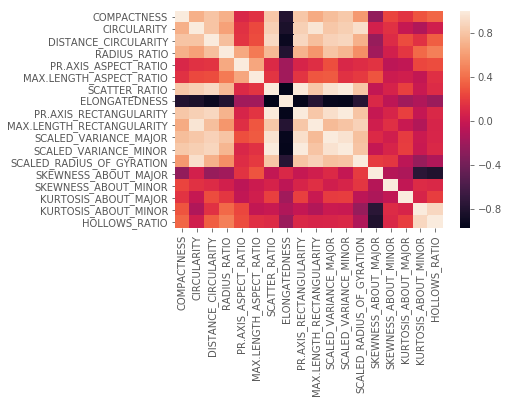

In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

df = pd.read_csv('dataset_54_vehicle.csv', sep=',')
df.head(10)
sns.heatmap(df.corr())

In [9]:
df.corr(method ='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
COMPACTNESS,1.0,0.69,0.79,0.69,0.093,0.15,0.81,-0.79,0.81,0.68,0.76,0.82,0.59,-0.25,0.23,0.16,0.3,0.37
CIRCULARITY,0.69,1.0,0.8,0.62,0.15,0.25,0.86,-0.83,0.86,0.97,0.81,0.85,0.94,0.059,0.15,-0.015,-0.11,0.039
DISTANCE_CIRCULARITY,0.79,0.8,1.0,0.77,0.16,0.26,0.91,-0.91,0.9,0.77,0.86,0.89,0.71,-0.23,0.12,0.26,0.15,0.34
RADIUS_RATIO,0.69,0.62,0.77,1.0,0.67,0.45,0.74,-0.79,0.71,0.57,0.8,0.73,0.54,-0.18,0.051,0.17,0.38,0.47
PR.AXIS_ASPECT_RATIO,0.093,0.15,0.16,0.67,1.0,0.65,0.11,-0.19,0.08,0.13,0.27,0.092,0.12,0.15,-0.057,-0.034,0.24,0.27
MAX.LENGTH_ASPECT_RATIO,0.15,0.25,0.26,0.45,0.65,1.0,0.17,-0.18,0.16,0.31,0.32,0.14,0.19,0.29,0.015,0.043,-0.027,0.14
SCATTER_RATIO,0.81,0.86,0.91,0.74,0.11,0.17,1.0,-0.97,0.99,0.81,0.95,1.0,0.8,-0.029,0.074,0.21,0.0041,0.12
ELONGATEDNESS,-0.79,-0.83,-0.91,-0.79,-0.19,-0.18,-0.97,1.0,-0.95,-0.78,-0.94,-0.96,-0.77,0.1,-0.053,-0.19,-0.11,-0.22
PR.AXIS_RECTANGULARITY,0.81,0.86,0.9,0.71,0.08,0.16,0.99,-0.95,1.0,0.81,0.94,0.99,0.8,-0.016,0.082,0.21,-0.022,0.099
MAX.LENGTH_RECTANGULARITY,0.68,0.97,0.77,0.57,0.13,0.31,0.81,-0.78,0.81,1.0,0.75,0.8,0.87,0.04,0.14,0.0012,-0.11,0.077


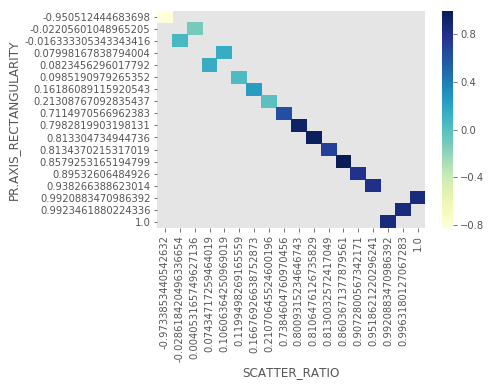

In [10]:
df.head()
heatmap1_data = pd.pivot_table(df.corr(), values='CIRCULARITY', index=['PR.AXIS_RECTANGULARITY'], columns='SCATTER_RATIO')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset_54_vehicle.csv', sep=',')
#print(df.head().T)
print(df.shape)
data = df.iloc[:,:-1]
label = df.iloc[:,18]
data_train, data_test, labels_train, labels_test = train_test_split(data, label, test_size=0.2, random_state=42)
print(data_train.shape)
print(data_test.shape)


(846, 19)
(676, 18)
(170, 18)


In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,
            max_features=4)
model


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
import random 
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
params = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}
params
##model = DecisionTreeClassifier(**params)


{'max_depth': [3, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x23ceb5bec18>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen at 0x23ceb5becf8>}

In [15]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV



# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, params, cv=5)

# Fit it to the data
tree_cv.fit(data, label)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.6855791962174941


In [25]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
model = tree.DecisionTreeClassifier( max_depth = None, max_features= 5,min_samples_leaf= 3)
model.fit(data, label)
model.predict(data_test)
#accuracy_score(label_test,y_pred)

array(['bus', 'saab', 'bus', 'bus', 'bus', 'van', 'van', 'opel', 'bus',
       'saab', 'saab', 'bus', 'van', 'opel', 'opel', 'van', 'saab', 'bus',
       'saab', 'opel', 'van', 'van', 'saab', 'opel', 'opel', 'saab',
       'opel', 'van', 'van', 'van', 'opel', 'van', 'bus', 'van', 'van',
       'bus', 'bus', 'saab', 'bus', 'saab', 'van', 'bus', 'saab', 'saab',
       'opel', 'opel', 'bus', 'van', 'bus', 'van', 'bus', 'bus', 'van',
       'saab', 'bus', 'opel', 'saab', 'opel', 'saab', 'saab', 'bus',
       'van', 'saab', 'bus', 'bus', 'bus', 'saab', 'saab', 'opel', 'opel',
       'saab', 'bus', 'saab', 'bus', 'van', 'van', 'saab', 'opel', 'saab',
       'van', 'bus', 'van', 'saab', 'opel', 'opel', 'opel', 'saab', 'bus',
       'van', 'saab', 'saab', 'opel', 'bus', 'bus', 'opel', 'saab', 'van',
       'opel', 'bus', 'opel', 'saab', 'saab', 'opel', 'van', 'bus', 'bus',
       'saab', 'van', 'saab', 'saab', 'van', 'bus', 'van', 'bus', 'bus',
       'van', 'bus', 'opel', 'bus', 'saab', 'bus'

feature_importances_

In [17]:
model.feature_importances_

array([0.06658926, 0.07514291, 0.07076242, 0.0761836 , 0.05384647,
       0.07834734, 0.01249862, 0.01332952, 0.00390366, 0.05355407,
       0.07410236, 0.1894681 , 0.02775214, 0.11367834, 0.02075667,
       0.02142065, 0.01461684, 0.03404704])

In [18]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(model, 
                out_file='dot_data.dot', 
                feature_names = data.columns,
                class_names = 'Class',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [19]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
from sklearn import tree  
import pydotplus

dotfile = StringIO()
tree.export_graphviz(model, 
                out_file=dotfile, 
                feature_names = data.columns,
                class_names = 'Class',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")

True

In [20]:
graph.write_pdf("dtree.pdf")

True